# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">

<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Gustavo!👏 

O seu trabalho demonstra alta qualidade, com código bem estruturado e comentários relevantes em cada etapa. Fiz algumas sugestões que podem contribuir para elevar ainda mais a qualidade do projeto.

O projeto está aprovado. Continue com o excelente trabalho!

</div>

In [14]:
import pandas as pd

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

print("Hypotheses:\n", hypotheses.head(), "\n")
print("Orders:\n", orders.head(), "\n")
print("Visits:\n", visits.head(), "\n")

print("\nTipos de Dados:")
print(orders.info())
print(visits.info())

orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

duplicated_visitors = orders.groupby('visitorId')['group'].nunique()
conflicting_visitors = duplicated_visitors[duplicated_visitors > 1].index
print(f"Usuários em ambos os grupos: {len(conflicting_visitors)}")

orders_clean = orders[~orders['visitorId'].isin(conflicting_visitors)]

print("Dados processados e limpos.")


Hypotheses:
                                           Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1   

Orders:
    transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B 

Visits:
          date group  visits
0  2019-08-01     A     719
1 

In [24]:
#Parte 1 - priorizando hipóteses

import pandas as pd

print("Hypotheses:\n", hypotheses.head(), "\n")
print("Orders:\n", orders.head(), "\n")
print("Visits:\n", visits.head(), "\n")

orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

duplicated_visitors = orders.groupby('visitorId')['group'].nunique()
conflicting_visitors = duplicated_visitors[duplicated_visitors > 1].index
print(f"Usuários em ambos os grupos: {len(conflicting_visitors)}")

hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

hypotheses_sorted = hypotheses.sort_values(by='ICE', ascending=False)
print("\nHipóteses priorizadas pelo framework ICE:\n", hypotheses_sorted[['Hypothesis', 'ICE']])

print("Dados processados e limpos.")

Hypotheses:
                                           Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort        ICE  RICE  
0           8       6  13.333333  40.0  
1           4      10   2.000000   4.0  
2           7       3   7.000000  56.0  
3           3       8   1.125000   9.0  
4           1       1   1.000000   3.0   

Orders:
    transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

- Os dados foram processados corretamente
    
Sugestões adicionais: Realizar análise de dados nulos

</div>

In [25]:
# Framework RICE

import pandas as pd

hypotheses.columns = hypotheses.columns.str.strip()

print("Hypotheses:\n", hypotheses.head(), "\n")
print("Orders:\n", orders.head(), "\n")
print("Visits:\n", visits.head(), "\n")

duplicated_visitors = orders.groupby('visitorId')['group'].nunique()
conflicting_visitors = duplicated_visitors[duplicated_visitors > 1].index
print(f"Usuários em ambos os grupos: {len(conflicting_visitors)}")

orders_clean = orders[~orders['visitorId'].isin(conflicting_visitors)]

hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

hypotheses_sorted_rice = hypotheses.sort_values(by='RICE', ascending=False)
print("\nHipóteses priorizadas pelo framework RICE:\n", hypotheses_sorted_rice[['Hypothesis', 'RICE']])

print("Dados processados e limpos.")

Hypotheses:
                                           Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort        ICE  RICE  
0           8       6  13.333333  40.0  
1           4      10   2.000000   4.0  
2           7       3   7.000000  56.0  
3           3       8   1.125000   9.0  
4           1       1   1.000000   3.0   

Orders:
    transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887

In [26]:

hypotheses_sorted_ice = hypotheses.sort_values(by='ICE', ascending=False)[['Hypothesis', 'ICE']]
hypotheses_sorted_rice = hypotheses.sort_values(by='RICE', ascending=False)[['Hypothesis', 'RICE']]

comparison = hypotheses_sorted_ice.merge(hypotheses_sorted_rice, on="Hypothesis", suffixes=("_ICE", "_RICE"))
print(comparison)


                                          Hypothesis        ICE   RICE
0  Launch a promotion that gives users discounts ...  16.200000   16.2
1  Add two new channels for attracting traffic. T...  13.333333   40.0
2  Add a subscription form to all the main pages....  11.200000  112.0
3  Show banners with current offers and sales on ...   8.000000   40.0
4  Add product recommendation blocks to the store...   7.000000   56.0
5  Launch your own delivery service. This will sh...   2.000000    4.0
6  Add a customer review page. This will increase...   1.333333    4.0
7  Change the category structure. This will incre...   1.125000    9.0
8  Change the background color on the main page. ...   1.000000    3.0


Conclusão:

O ICE favorece hipóteses com alto Impacto e Confiança, independentemente de quantas pessoas serão atingidas.

O RICE prioriza hipóteses que têm um alcance maior, porque podem gerar um impacto positivo para mais usuários.

Se o objetivo for crescimento rápido, faz sentido escolher hipóteses com alta pontuação RICE.
Se houver limitação de recursos ou foco em impacto imediato, hipóteses com alta pontuação ICE podem ser mais viáveis.


<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
RICE e ICE calculados com sucesso! 

Sugestão:
Aqui você poderia plotar a distribuição dos atributos de cada hipótese usando um gráfico de caixa (boxplot). 
    
```python
df_hypotheses.drop(columns=['ICE', 'RICE']).boxplot(figsize=(10, 6))
... # seu código
```
    
</div>




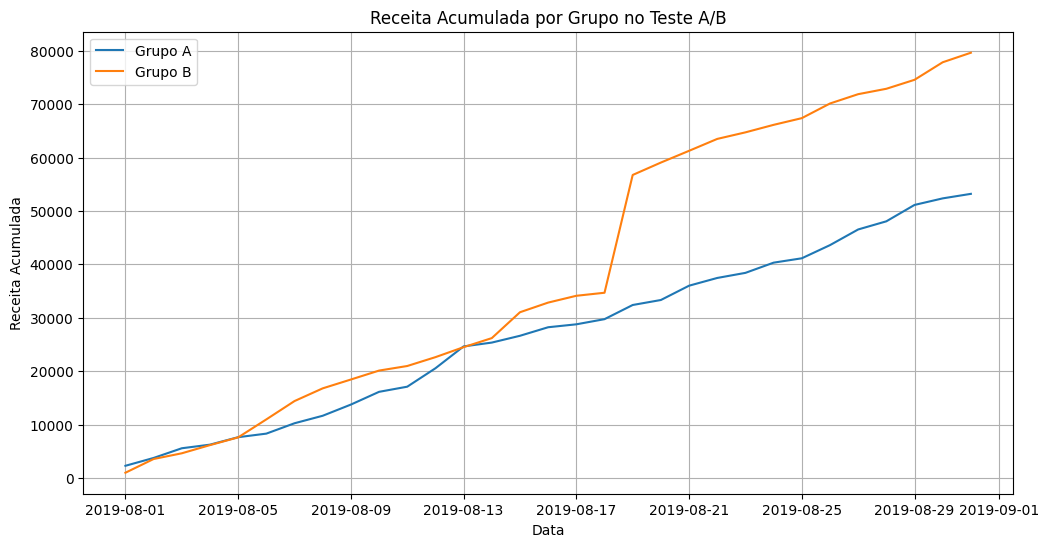

In [30]:
#Tarefa 2
#Análise da receita acumulada

import pandas as pd
import matplotlib.pyplot as plt

cumulative_revenue = orders_clean.groupby(['date', 'group'])['revenue'].sum().groupby('group').cumsum().reset_index()

plt.figure(figsize=(12, 6))
for group in cumulative_revenue['group'].unique():
    group_data = cumulative_revenue[cumulative_revenue['group'] == group]
    plt.plot(group_data['date'], group_data['revenue'], label=f'Grupo {group}')

plt.xlabel('Data')
plt.ylabel('Receita Acumulada')
plt.title('Receita Acumulada por Grupo no Teste A/B')
plt.legend()
plt.grid(True)
plt.show()



Ambos os grupos (A e B) apresentam crescimento semelhante nos primeiros dias, mas tem um desvio significativo no meio do teste;

Após o salto, o grupo B continua com uma receita acumulada maior que a do grupo A.
Possivelmente causado por:
- O grupo B pode ter gerado mais receita por usuário.
- A métrica testada no grupo B pode ter sido mais eficiente.

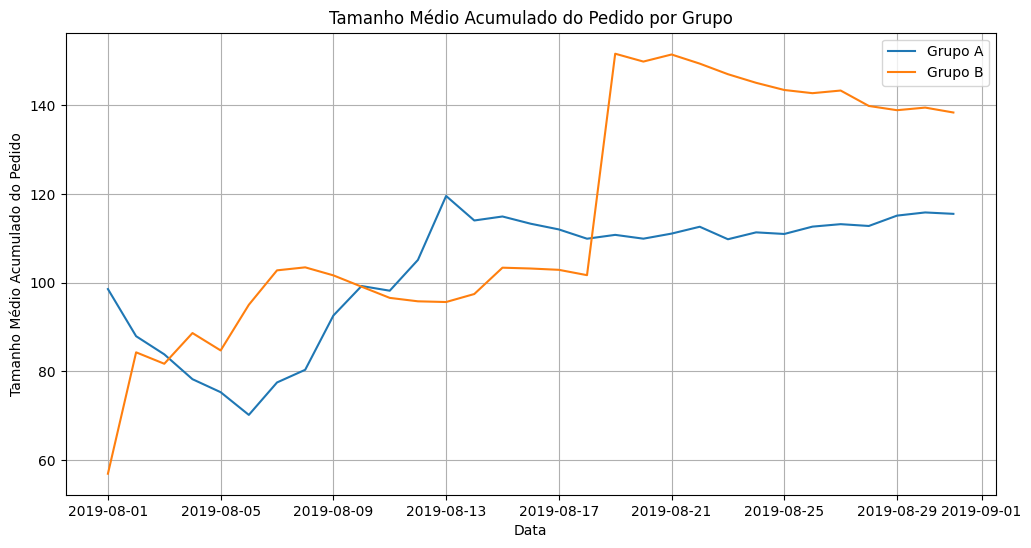

Dados processados e limpos.


In [31]:
# Tamanho médio acumulado do pedido

cumulative_orders = orders_clean.groupby(['date', 'group']).agg({'revenue': 'sum', 'transactionId': 'nunique'}).reset_index()
cumulative_orders['average_order_size'] = cumulative_orders['revenue'] / cumulative_orders['transactionId']
cumulative_orders['cumulative_average_order_size'] = cumulative_orders.groupby('group')['average_order_size'].cumsum() / cumulative_orders.groupby('group').cumcount().add(1)

plt.figure(figsize=(12, 6))
for group in cumulative_orders['group'].unique():
    group_data = cumulative_orders[cumulative_orders['group'] == group]
    plt.plot(group_data['date'], group_data['cumulative_average_order_size'], label=f'Grupo {group}')

plt.xlabel('Data')
plt.ylabel('Tamanho Médio Acumulado do Pedido')
plt.title('Tamanho Médio Acumulado do Pedido por Grupo')
plt.legend()
plt.grid(True)
plt.show()


Aqui percebemos maior oscilações entre os grupos, mas novamente o grupo B tem um aumento brusco da metade do gráfico em dinte, conseguindo se manter constante até o final. Acredito que sejam pelas mesmas razões nas quais citei no markdown acima.

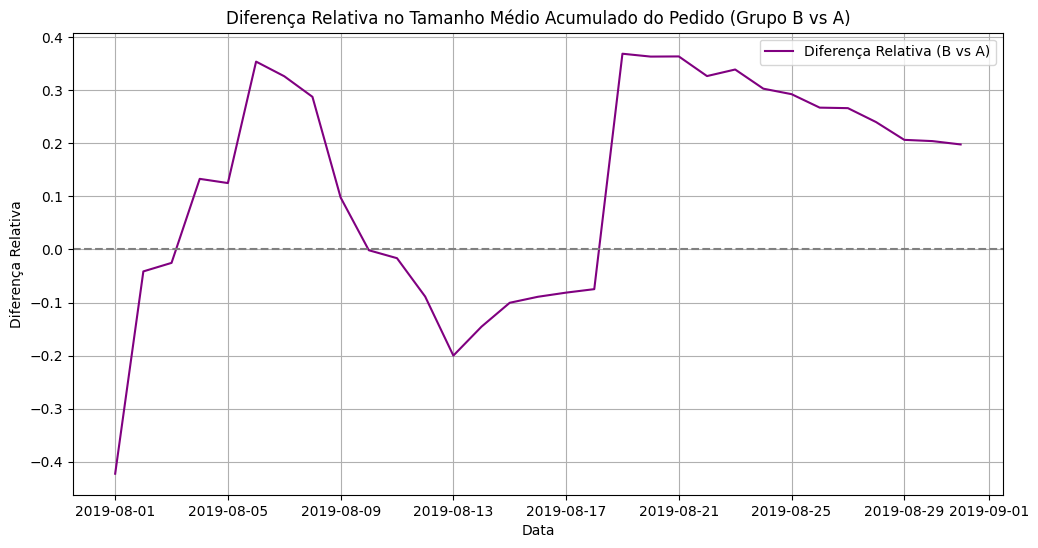

In [32]:
# Diferença relativa no tamanho médio acumulado do pedido (Grupo B em relação ao A)

cumulative_pivot = cumulative_orders.pivot(index='date', columns='group', values='cumulative_average_order_size')
cumulative_pivot['relative_difference'] = (cumulative_pivot['B'] / cumulative_pivot['A']) - 1

plt.figure(figsize=(12, 6))
plt.plot(cumulative_pivot.index, cumulative_pivot['relative_difference'], label='Diferença Relativa (B vs A)', color='purple')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa')
plt.title('Diferença Relativa no Tamanho Médio Acumulado do Pedido (Grupo B vs A)')
plt.legend()
plt.grid(True)
plt.show()


Conforme o gráfico, podemos dizer que nos momentos em que se encontra acima de zero, o grupo B tem pedidos médios maiores que grupo A. Ao passo que quando está abaixo de zero, o grupo B tem pedidos médios menores.


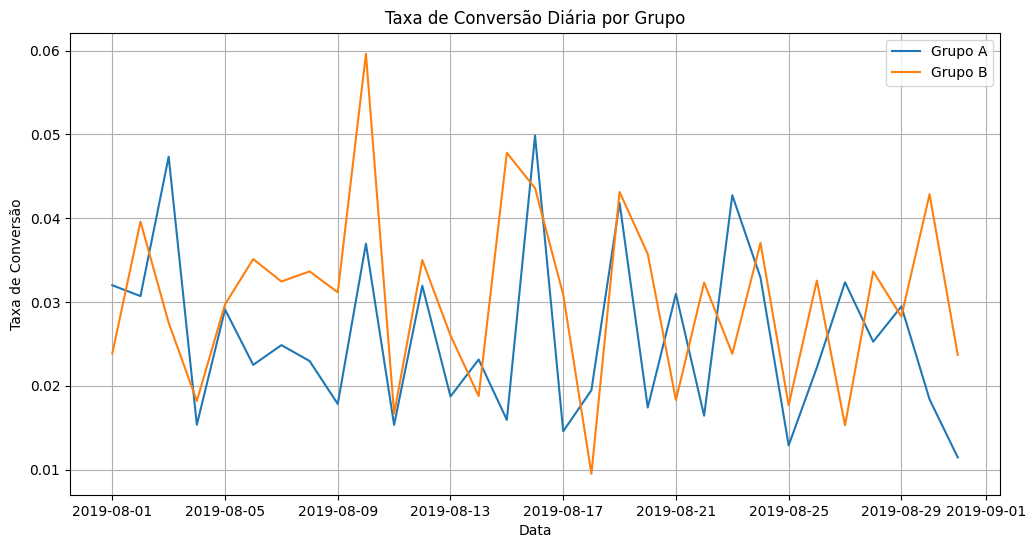

In [33]:
# Taxa de conversão diária (proporção de pedidos por visitas)

daily_orders = orders_clean.groupby(['date', 'group'])['transactionId'].nunique().reset_index()
daily_visits = visits.groupby(['date', 'group'])['visits'].sum().reset_index()

daily_conversion = pd.merge(daily_orders, daily_visits, on=['date', 'group'])
daily_conversion['conversion_rate'] = daily_conversion['transactionId'] / daily_conversion['visits']

plt.figure(figsize=(12, 6))
for group in daily_conversion['group'].unique():
    group_data = daily_conversion[daily_conversion['group'] == group]
    plt.plot(group_data['date'], group_data['conversion_rate'], label=f'Grupo {group}')

plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.title('Taxa de Conversão Diária por Grupo')
plt.legend()
plt.grid(True)
plt.show()

Percebe-se muitas oscilações para ambos os grupos, o que sugere que não há períodos de estabilidade

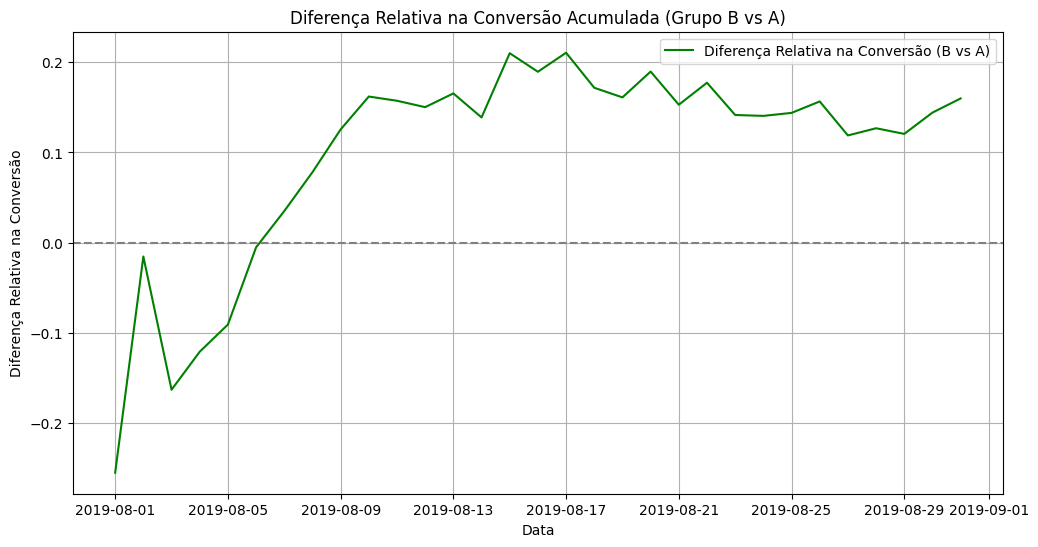

In [34]:
# Taxa de conversão acumulada

cumulative_visits = visits.groupby(['date', 'group'])['visits'].sum().groupby('group').cumsum().reset_index()
cumulative_orders_count = orders_clean.groupby(['date', 'group'])['transactionId'].nunique().groupby('group').cumsum().reset_index()
cumulative_conversion = pd.merge(cumulative_orders_count, cumulative_visits, on=['date', 'group'])
cumulative_conversion['cumulative_conversion_rate'] = cumulative_conversion['transactionId'] / cumulative_conversion['visits']

cumulative_conversion_pivot = cumulative_conversion.pivot(index='date', columns='group', values='cumulative_conversion_rate')
cumulative_conversion_pivot['relative_difference'] = (cumulative_conversion_pivot['B'] / cumulative_conversion_pivot['A']) - 1

plt.figure(figsize=(12, 6))
plt.plot(cumulative_conversion_pivot.index, cumulative_conversion_pivot['relative_difference'], label='Diferença Relativa na Conversão (B vs A)', color='green')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Diferença Relativa na Conversão')
plt.title('Diferença Relativa na Conversão Acumulada (Grupo B vs A)')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>
    
Uau todos os gráficos foram realizados corretamente! Muito bom! :)
</div>

Conforme o gráfico, a linha estando acima de zero: é sinal que o grupo B tem uma taxa de conversão acumulada maior que o grupo A. No momento que a linha estava abaixo de zero, então o grupo B teve uma taxa de conversão acumulada menor.

Percebe-se que a linha se estabiliza, mostrando uma vantagem consistente que se mantém ao longo do tempo. Dito isso, 
como vemos que a linha está consistentemente acima de zero, é uma evidência de que a variação do grupo B pode ter resultado em uma taxa de conversão melhor.

In [36]:
# Calcular percentis 95 e 99

orders_per_user = orders_clean.groupby('visitorId')['transactionId'].nunique()

percentile_95 = orders_per_user.quantile(0.95)
percentile_99 = orders_per_user.quantile(0.99)

print(f"Percentil 95: {percentile_95:.0f} pedidos por usuário")
print(f"Percentil 99: {percentile_99:.0f} pedidos por usuário")

anomalia_limite = percentile_99
print(f"Ponto de corte para anomalia: {anomalia_limite:.0f} pedidos por usuário")

Percentil 95: 1 pedidos por usuário
Percentil 99: 2 pedidos por usuário
Ponto de corte para anomalia: 2 pedidos por usuário


95% dos usuários fizeram apenas 1 pedido durante o teste.
Apenas 1% dos usuários fez 2 ou mais pedidos.
Qualquer usuário com mais de 2 pedidos é considerado uma anomalia (outlier).

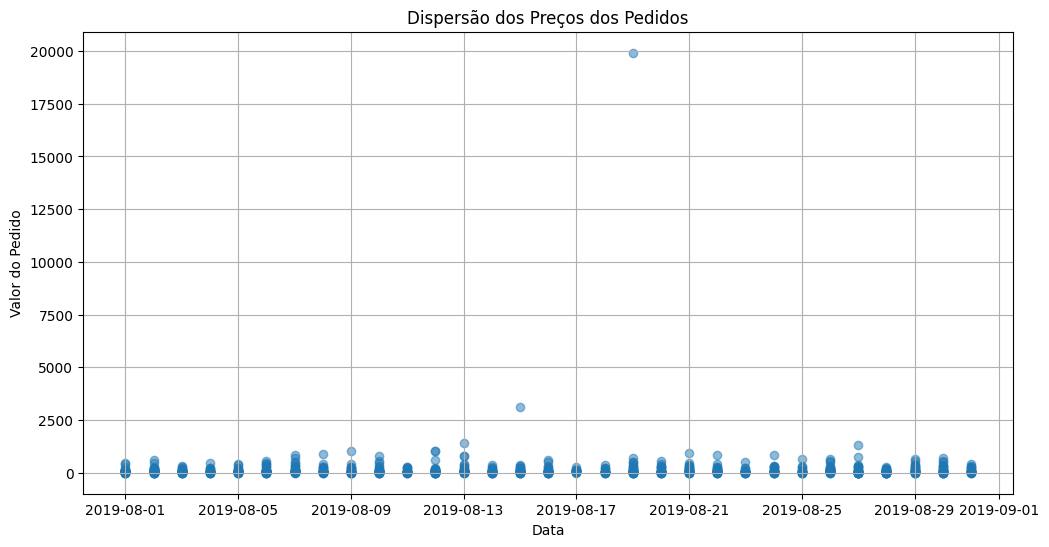

In [37]:
# Gráfico de dispersão dos preços dos pedidos
plt.figure(figsize=(12, 6))
plt.scatter(orders_clean['date'], orders_clean['revenue'], alpha=0.5)
plt.title('Dispersão dos Preços dos Pedidos')
plt.xlabel('Data')
plt.ylabel('Valor do Pedido')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário: </b> <a class="tocSkip"></a>
    
- Percentis calculados com sucesso!
- Gráfico de dispersão correto

Percebe-se uma grande constância do preços dos pedidos, o que sugere que os clientes costumam fazer compras com valores similiares, salvo raras exceções como se nota no gráfico.

In [41]:
# Percentis 95 e 99 dos preços dos pedidos

orders_per_user = orders_clean.groupby('visitorId')['transactionId'].nunique()

percentile_95_revenue = orders_clean['revenue'].quantile(0.95)
percentile_99_revenue = orders_clean['revenue'].quantile(0.99)

print(f"Percentil 95 dos preços: {percentile_95_revenue:.2f}")
print(f"Percentil 99 dos preços: {percentile_99_revenue:.2f}")

anomalia_limite_1 = percentile_99_revenue
print(f"Ponto de corte para anomalia: {anomalia_limite_1:.0f} pedidos por usuário")


Percentil 95 dos preços: 414.27
Percentil 99 dos preços: 830.30
Ponto de corte para anomalia: 830 pedidos por usuário


- 95% dos pedidos têm um valor igual ou inferior a 414,27;
- Apenas 5% dos pedidos superam esse valor, ou seja, pedidos acima de R$414 são relativamente raros;
- 99% dos pedidos têm um valor igual ou inferior a 830,30;

- Apenas 1% dos pedidos superam R$830, ou seja, esses pedidos são outliers extremos.

In [44]:
# Teste de significância estatística da diferença na conversão

from statsmodels.stats.proportion import proportions_ztest

visits_group = visits.groupby('group')['visits'].sum()
orders_group = orders_clean.groupby('group')['transactionId'].nunique()

conversion_group = orders_group / visits_group
print(f"Taxa de conversão do Grupo A: {conversion_group['A']:.4%}")
print(f"Taxa de conversão do Grupo B: {conversion_group['B']:.4%}")

count = orders_group.values
nobs = visits_group.values
z_stat, p_value = proportions_ztest(count, nobs)

print(f"Estatística Z: {z_stat:.2f}")
print(f"Valor-p: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Diferença estatisticamente significativa entre os grupos (p < 0.05)")
else:
    print("Não há diferença estatisticamente significativa entre os grupos (p >= 0.05)")

Taxa de conversão do Grupo A: 2.4979%
Taxa de conversão do Grupo B: 2.8970%
Estatística Z: -2.39
Valor-p: 0.0169
Diferença estatisticamente significativa entre os grupos (p < 0.05)


A variação testada no Grupo B teve um impacto positivo sobre a taxa de conversão. Isso sugere que:

O novo design, funcionalidade ou estratégia testada no Grupo B melhorou o desempenho do site em termos de conversão.
Essa melhoria é estatisticamente confiável, ou seja, não é apenas uma flutuação aleatória

In [45]:
# Significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos

from scipy.stats import mannwhitneyu

revenue_a = orders_clean[orders_clean['group'] == 'A']['revenue']
revenue_b = orders_clean[orders_clean['group'] == 'B']['revenue']

stat, p_value = mannwhitneyu(revenue_a, revenue_b, alternative='two-sided')

print(f"Estatística U: {stat:.2f}")
print(f"Valor-p: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Diferença estatisticamente significativa no tamanho médio do pedido entre os grupos (p < 0.05)")
else:
    print("Não há diferença estatisticamente significativa no tamanho médio do pedido entre os grupos (p >= 0.05)")


Estatística U: 129041.50
Valor-p: 0.8622
Não há diferença estatisticamente significativa no tamanho médio do pedido entre os grupos (p >= 0.05)


In [46]:
# Significância estatística da diferença na conversão entre os grupos usando os dados filtrados

orders_per_user = orders_clean.groupby('visitorId')['transactionId'].nunique()

outliers = orders_per_user[orders_per_user > 2].index

orders_filtered = orders_clean[~orders_clean['visitorId'].isin(outliers)]

visits_group = visits.groupby('group')['visits'].sum()
orders_group_filtered = orders_filtered.groupby('group')['transactionId'].nunique()

conversion_group_filtered = orders_group_filtered / visits_group

print(f"Taxa de conversão filtrada do Grupo A: {conversion_group_filtered['A']:.4%}")
print(f"Taxa de conversão filtrada do Grupo B: {conversion_group_filtered['B']:.4%}")

count_filtered = orders_group_filtered.values
nobs_filtered = visits_group.values

z_stat_filtered, p_value_filtered = proportions_ztest(count_filtered, nobs_filtered)

print(f"Estatística Z (filtrada): {z_stat_filtered:.2f}")
print(f"Valor-p (filtrado): {p_value_filtered:.4f}")

alpha = 0.05
if p_value_filtered < alpha:
    print("Diferença estatisticamente significativa entre os grupos após filtrar outliers (p < 0.05)")
else:
    print("Não há diferença estatisticamente significativa entre os grupos após filtrar outliers (p >= 0.05)")


Taxa de conversão filtrada do Grupo A: 2.4178%
Taxa de conversão filtrada do Grupo B: 2.8653%
Estatística Z (filtrada): -2.71
Valor-p (filtrado): 0.0068
Diferença estatisticamente significativa entre os grupos após filtrar outliers (p < 0.05)


Mesmo após remover usuários atípicos (outliers), o grupo B continuou performando significativamente melhor do que o grupo A em termos de conversão.

Isso dá uma maior segurança de que o resultado positivo observado para o grupo B não foi influenciado apenas por poucos usuários "fora da curva", e sim representa uma diferença consistente no comportamento da maioria dos usuários.

In [47]:
# Significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados.

revenue_a_filtered = orders_filtered[orders_filtered['group'] == 'A']['revenue']
revenue_b_filtered = orders_filtered[orders_filtered['group'] == 'B']['revenue']

stat_filtered, p_value_filtered = mannwhitneyu(revenue_a_filtered, revenue_b_filtered, alternative='two-sided')

print(f"Estatística U (filtrada): {stat_filtered:.2f}")
print(f"Valor-p (filtrado): {p_value_filtered:.4f}")

alpha = 0.05
if p_value_filtered < alpha:
    print("Diferença estatisticamente significativa no tamanho médio do pedido entre os grupos após filtrar outliers (p < 0.05)")
else:
    print("Não há diferença estatisticamente significativa no tamanho médio do pedido entre os grupos após filtrar outliers (p >= 0.05)")


Estatística U (filtrada): 124210.00
Valor-p (filtrado): 0.7486
Não há diferença estatisticamente significativa no tamanho médio do pedido entre os grupos após filtrar outliers (p >= 0.05)


<div class="alert alert-block alert-success">

<b>Comentário v3: </b> <a class="tocSkip"></a>
    
Todos os testes foram realizados corretamente. 
</div>

Não houve alteração significativa do valor médio dos pedidos — ou seja, os clientes do grupo B compraram com mais frequência, mas não compraram produtos de valores médios diferentes dos clientes do grupo A.

Conclusão:

Com base nos resultados do teste A/B, recomendo encerrar o teste e considerar a variação testada no Grupo B como a vencedora. 

O Grupo B apresentou uma taxa de conversão significativamente maior do que o Grupo A, mesmo após a remoção de outliers. 

Além disso, o tamanho médio dos pedidos não apresentou diferença significativa entre os grupos, garantindo que o aumento de conversão não comprometeu a qualidade ou valor das compras. Portanto, a implementação da variação testada no Grupo B é recomendada para o ambiente de produção.



<div class="alert alert-block alert-success">

<b>Comentário v3: </b> <a class="tocSkip"></a>
    
Conclusão muito boa baseada em dados
</div>